# Neural Networks with Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Dataset
Using the MNIST Fashion Dataset. This is a dataset that is included in keras.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images[0, 19, 1] # Grayscale - between 0 and 255

233

In [12]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

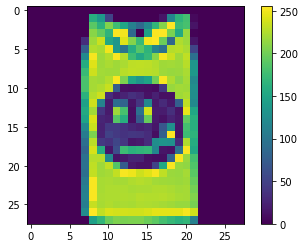

In [24]:
plt.figure()
plt.imshow(train_images[101])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

Squish to get the pixels in range [0, 1] by diving by 255

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Model Building

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Lattens 28x28 structure - layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
    ])

# We have 10 classes - hence 10 output neurons

## Compile the Model

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs=5)
# Too many epochs could make the model overfit

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1584 - accuracy: 0.9403
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1531 - accuracy: 0.9427
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1496 - accuracy: 0.9435
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9446
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9456


In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
display(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8893


'Test accuracy: 0.8892999887466431'

## Making predictions

In [46]:
predictions = model.predict(test_images)
class_names[np.argmax(predictions[0])] # Predicted as class 9 - Ankleboot

313/313 [==============================] - 0s 1ms/step


'Ankle boot'

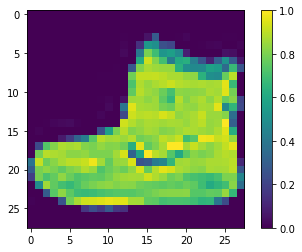

In [47]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number:  0


1/1 [==============================] - 0s 11ms/step
Expected: Ankle boot
Guess: Ankle boot


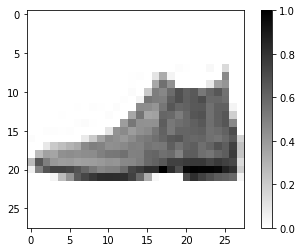

In [53]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    print("Expected: " + label)
    print("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
